# Flickr

In [1]:
import flickr
import pandas as pd
from PIL import Image
import urllib.request
import pylab
import os

## Image search start

In [2]:
text = 'dog with wings'
path = text
count = 100

if not os.path.exists(text):
    os.makedirs(text)

In [3]:
# Extras - comma-delimited list of extra information.
# `url_o` - URL of original size image.
# `url_q` - URL of square 150x150 size image.

api = flickr.API(
    text=text,
    sort='relevance',
    media='photos',
    extras='url_o,url_q',
    per_page=count,
    page=1
)

In [4]:
photos = api.search()

In [5]:
photos.keys()

dict_keys(['page', 'pages', 'perpage', 'total', 'photo'])

## Clear view

In [6]:
dataframe = pd.DataFrame(data=photos['photo'])
dataframe.head(10)

,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,url_o,height_o,width_o,url_q,height_q,width_q
0,41724312555,124444619@N06,fce20226c9,1728,2,Flying without Wings,1,0,0,https://live.staticflickr.com/1728/41724312555...,2627.0,4203.0,https://live.staticflickr.com/1728/41724312555...,150,150
1,43218810540,150931705@N08,59a31426f0,1925,2,A Dog's Loyalty knows no boundaries,1,0,0,https://live.staticflickr.com/1925/43218810540...,2172.0,3861.0,https://live.staticflickr.com/1925/43218810540...,150,150
2,31056375448,29487672@N07,99becd9cc1,1947,2,Dog Wings,1,0,0,https://live.staticflickr.com/1947/31056375448...,4657.0,4016.0,https://live.staticflickr.com/1947/31056375448...,150,150
3,38941929490,123474721@N06,ca2dc9faf5,4772,5,Daedalus and Icarus,1,0,0,NaN,NaN,NaN,https://live.staticflickr.com/4772/38941929490...,150,150
4,36637275262,33134647@N07,79a388eb1a,4367,5,My angel...,1,0,0,NaN,NaN,NaN,https://live.staticflickr.com/4367/36637275262...,150,150
5,43157332850,29487672@N07,d85625e03b,1909,2,If I Could Fly,1,0,0,https://live.staticflickr.com/1909/43157332850...,4984.0,3827.0,https://live.staticflickr.com/1909/43157332850...,150,150
6,38527959295,150931705@N08,6176693b90,4599,5,Told you Red Bull gives you wings,1,0,0,https://live.staticflickr.com/4599/38527959295...,2361.0,3551.0,https://live.staticflickr.com/4599/38527959295...,150,150
7,33978683838,29487672@N07,9fe9672c5c,65535,66,Butterfly Wings,1,0,0,https://live.staticflickr.com/65535/3397868383...,4775.0,5873.0,https://live.staticflickr.com/65535/3397868383...,150,150
8,14171212824,77053801@N08,7f146a0ac9,7330,8,Wings,1,0,0,https://live.staticflickr.com/7330/14171212824...,3528.0,2748.0,https://live.staticflickr.com/7330/14171212824...,150,150
9,38697983744,150931705@N08,b18525d989,4635,5,Fairy Dogmother,1,0,0,https://live.staticflickr.com/4635/38697983744...,2172.0,3861.0,https://live.staticflickr.com/4635/38697983744...,150,150


In [7]:
# Number of non-null values.

dataframe[['id', 'url_q', 'url_o']].notnull().sum()

id       100
url_q    100
url_o     60
dtype: int64

## Image visualization

In [8]:
# Save image from url to local path.

def get_image(url, path, index):
    urllib.request.urlretrieve(url, os.path.join(path, '{}.jpg'.format(index)))

In [9]:
save = [get_image(url=url, path=path, index=index) for index, url in enumerate(dataframe['url_q'].tolist())]

if save:
    print('Done!')

Done!


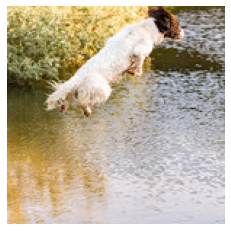

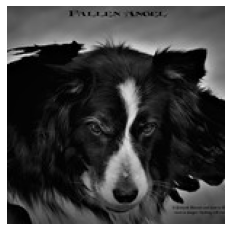

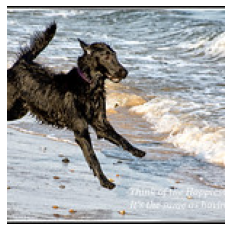

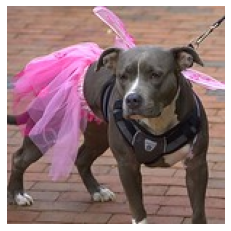

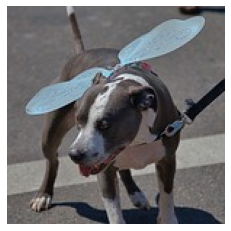

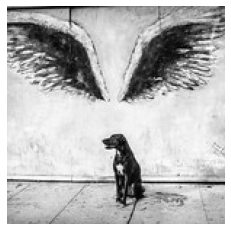

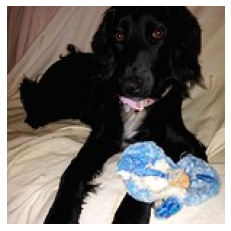

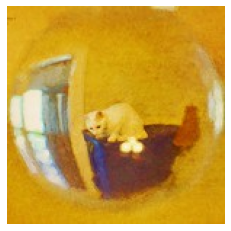

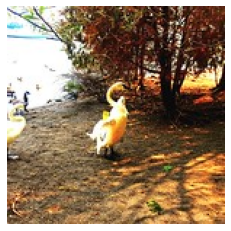

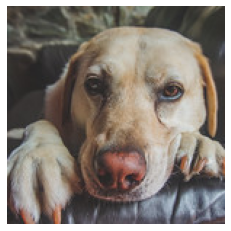

In [10]:
for index in range(10):
    image = Image.open(os.path.join(path, os.listdir(path)[index]))
    pylab.imshow(image)
    pylab.axis('off')
    pylab.show()